### 딥-러닝 과정 Mulit Layer Perceptron(MLP) 

## Keras 모델 생성/학습 - 당뇨병 예측 모델

In [1]:
# 1. Pandas 가져오기
import pandas as pd
import numpy as np 

In [5]:
# 2. 데이터 불러오기
df = pd.read_csv('diabetes_data.csv')

df.head()

,pregnant,gloucose,blood pressure,skin thickness,insulin,BMI,DPF,age,result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
%matplotlib inline   
import matplotlib.pyplot as plt 
!pip install seaborn
import seaborn as sns 

<AxesSubplot:>

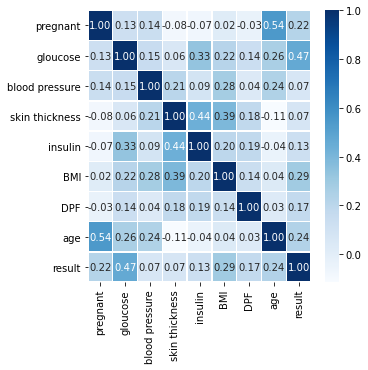

In [35]:
plt.figure(figsize=(5,5))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

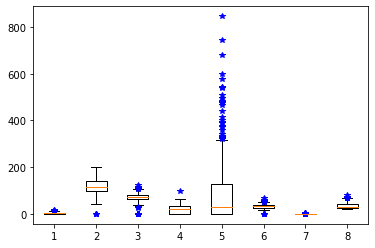

In [56]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 6]

%matplotlib inline

fig, ax = plt.subplots()
ax.boxplot([df['pregnant'], df['gloucose'],df['blood pressure'],df['skin thickness'],
           df['insulin'],df['BMI'],df['DPF'],df['age']],sym="b*")

plt.show()


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pregnant        768 non-null    int64  
 1   gloucose        768 non-null    int64  
 2   blood pressure  768 non-null    int64  
 3   skin thickness  768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   DPF             768 non-null    float64
 7   age             768 non-null    int64  
 8   result          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [63]:
df.describe() 

,pregnant,gloucose,blood pressure,skin thickness,insulin,BMI,DPF,age,result
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
glou_zero = df.loc[df.gloucose == 0]
df.

In [22]:
# 3. X/y 나누기

X = df.drop('result', axis=1)
y = df['result']

In [110]:
# 4. Train set, Test set 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=100)

X_val, X_test, y_val, y_test = train_test_split(X,y, test_size=0.5, random_state=100)

print(X_train.shape)
print(X_val.shape)
print('======'*2)
print(y_train.shape)
print(y_val.shape)

(614, 8)
(384, 8)
(614,)
(384,)


In [154]:
# 5. Keras 패키지 가져오기
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

In [162]:
# 6. MLP 모델 생성
model = keras.Sequential()

model.add(layers.Dense(input_dim =8, units=64, kernel_regularizer = keras.regularizers.L2(0.1)))
model.add(layers.Activation('relu'))
# model.add(kernel_regularizer = keras.regularizers.L2(0.1))

model.add(layers.Dense(units=128))
model.add(layers.Activation('relu'))
#model.add(layers.Dropout(0.2))  # 앞에있는 layer에 영향이 간다. 
          
model.add(layers.Dense(units=64))
model.add(layers.Activation('relu'))

model.add(layers.Dense(units=1))
model.add(layers.Activation('sigmoid'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 64)                576       
_________________________________________________________________
activation_43 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)               8320      
_________________________________________________________________
activation_44 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_45 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 1)               

In [163]:
# 7. Compile - Optimizer, Loss function 설정

sgd= keras.optimizers.SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])


In [164]:
# 8. 학습시키기

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',
                            patience=10 )    # val_loss가 올라갈때 참을성 10번 할당

history= model.fit(X_train,y_train,
          validation_data = (X_val, y_val),
          batch_size=16,
          epochs=100,
          verbose=1, 
          callbacks= [early_stopping])         
          #verbose 는 0,1,2 의 값만 가지게 된다. 학습이 진행되는 걸 보고 싶르면
          #0으로 지정, 안 보고 싶다면 1, loss 값만 보고 싶다면 2
         

Epoch 1/100
39/39 [==============================] - 1s 6ms/step - loss: 5.2161 - accuracy: 0.5247 - val_loss: 2.1572 - val_accuracy: 0.6797
Epoch 2/100
39/39 [==============================] - 0s 2ms/step - loss: 2.0842 - accuracy: 0.6293 - val_loss: 1.6390 - val_accuracy: 0.6719
Epoch 3/100
39/39 [==============================] - 0s 3ms/step - loss: 1.6292 - accuracy: 0.6255 - val_loss: 1.8837 - val_accuracy: 0.6667
Epoch 4/100
39/39 [==============================] - 0s 3ms/step - loss: 1.7215 - accuracy: 0.6070 - val_loss: 1.7606 - val_accuracy: 0.5469
Epoch 5/100
39/39 [==============================] - 0s 2ms/step - loss: 1.6312 - accuracy: 0.6502 - val_loss: 1.2764 - val_accuracy: 0.7266
Epoch 6/100
39/39 [==============================] - 0s 2ms/step - loss: 1.3381 - accuracy: 0.6504 - val_loss: 1.4994 - val_accuracy: 0.6823
Epoch 7/100
39/39 [==============================] - 0s 2ms/step - loss: 1.5006 - accuracy: 0.5951 - val_loss: 1.2662 - val_accuracy: 0.7083
Epoch 8/100
3

In [165]:
print(X_train.shape[0]/16)

38.375


# 9. 모델 평가하기

y_pred = model.predict(X_test)
print(y_pred)
print(np.array(y_test))

from sklearn.metrix import accuracy_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
pres =  precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)

print(acc)
print(pres)
print(recall)

In [166]:
train_result = model.evaluate(X_train, y_train)
test_result = model.evaluate(X_test, y_test)

print("train_result:", train_result)
print("test_result", test_result )

12/12 [==============================] - 0s 1ms/step - loss: 0.5401 - accuracy: 0.7604
train_result: [0.4856553375720978, 0.7866449356079102]
test_result [0.540130615234375, 0.7604166865348816]


In [141]:
# 10. 학습 시각화하기

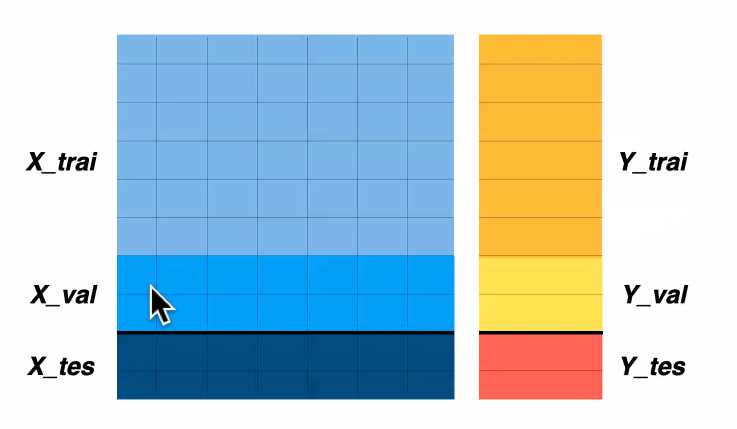

In [ ]:
1 epoch  가 진행 할때마다 X_valudation 검증한다는 과정 


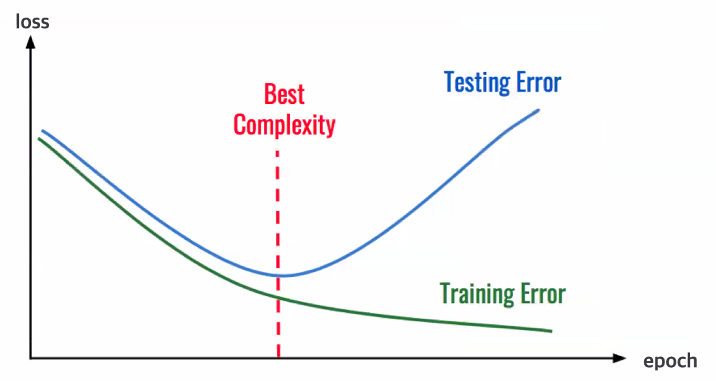

In [ ]:
즉, train이 낮아져도, 검증을 할때 안좋은 결과를 받을수도 있기때문에 위의 그림을 참고해야햔다.



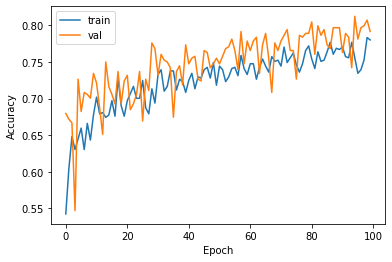

In [167]:

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

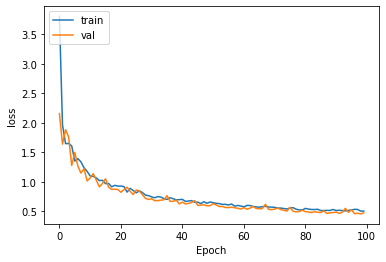

In [168]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()



# dropout으로 오버피팅을 방지해 줄수 있다. 